# Assignment 15 (Random Forests) Q1. Company Data

## Q1.  Random Forest Assignment


## About the data: 
## Let’s consider a Company dataset with around 10 variables and 400 records. 
## The attributes are as follows: 
##  Sales -- Unit sales (in thousands) at each location
##  Competitor Price -- Price charged by competitor at each location
##  Income -- Community income level (in thousands of dollars)
##  Advertising -- Local advertising budget for company at each location (in thousands of dollars)
##  Population -- Population size in region (in thousands)
##  Price -- Price company charges for car seats at each site
##  Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
##  Age -- Average age of the local population
##  Education -- Education level at each location
##  Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
##  US -- A factor with levels No and Yes to indicate whether the store is in the US or not
## The company dataset looks like this: 
 
## Problem Statement:
## A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
## Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets,tree
from sklearn.tree import export_graphviz 
from sklearn import externals
from io import StringIO
import pydotplus
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 

## Data Collection and Description 

In [2]:
# Loading the dataset
company_df = pd.read_csv("Company_Data.csv")

In [3]:
company_df1 = company_df.copy()

In [4]:
company_df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
# Summary Statistics of dataset
company_df1.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
# Check for Null Values
company_df1.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
# Checking the datatypes of each column
company_df1.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

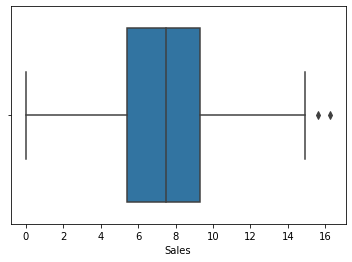

In [8]:
# Checking Outliers
ax = sns.boxplot(company_df1['Sales'])

## This Data has 2 Outlier Instances 

In [9]:
plt.rcParams["figure.figsize"] = 9,5

Skewness: 0.18556036318721578
Kurtosis: -0.08087736743346197


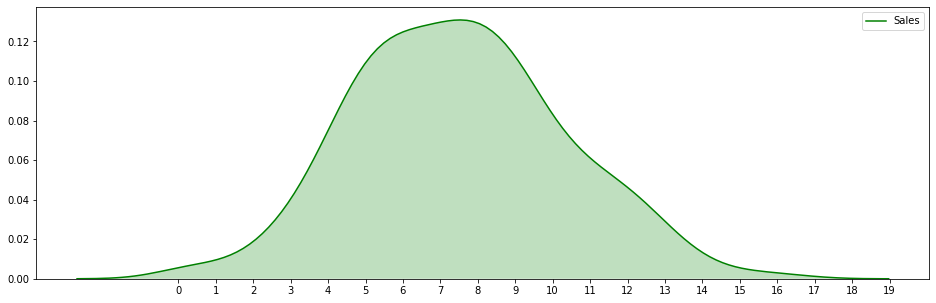

In [10]:
# Plotting Kernel Density Estimation Plot for Skewness and Kurtosis
plt.figure(figsize=(16,5))
print("Skewness: {}".format(company_df1['Sales'].skew()))
print("Kurtosis: {}".format(company_df1['Sales'].kurtosis()))
ax = sns.kdeplot(company_df1['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

## The Data is Skewed on the Right
## The Data has Negative Kurtosis 

In [11]:
obj_column = company_df1.select_dtypes(include='object').columns.tolist()

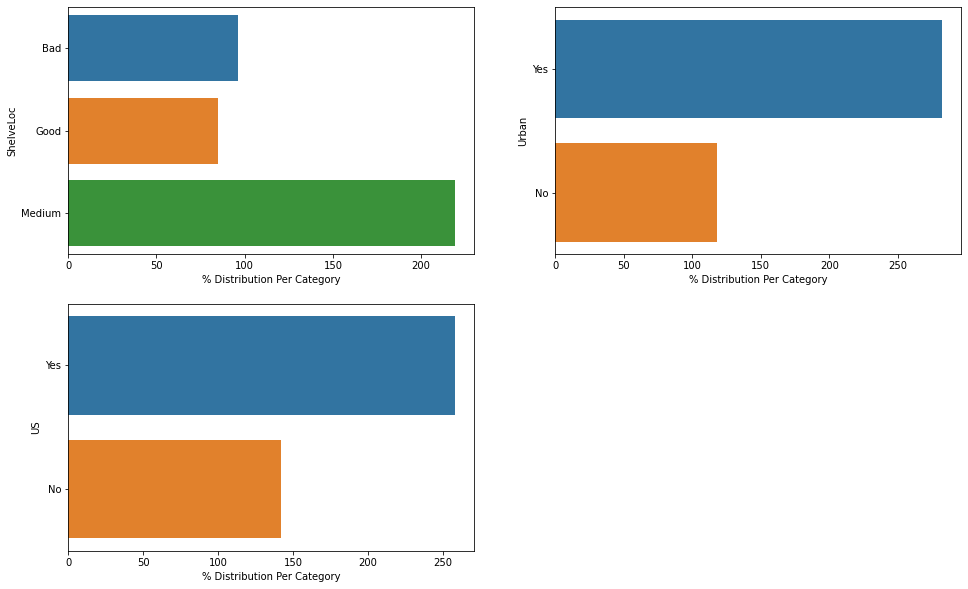

In [12]:
# Plotting Graphs
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_column,1):
    plt.subplot(2,2,i)
    sns.countplot(data=company_df1,y=col)
    plt.ylabel(col)
    plt.xlabel('% Distribution Per Category')
plt.show()

## From above graphs we can see that ShelveLoc column has more distribution per category for medium. Most of the values of Urban column and US column says Yes. 

In [13]:
num_columns = company_df1.select_dtypes(exclude='object').columns.tolist()

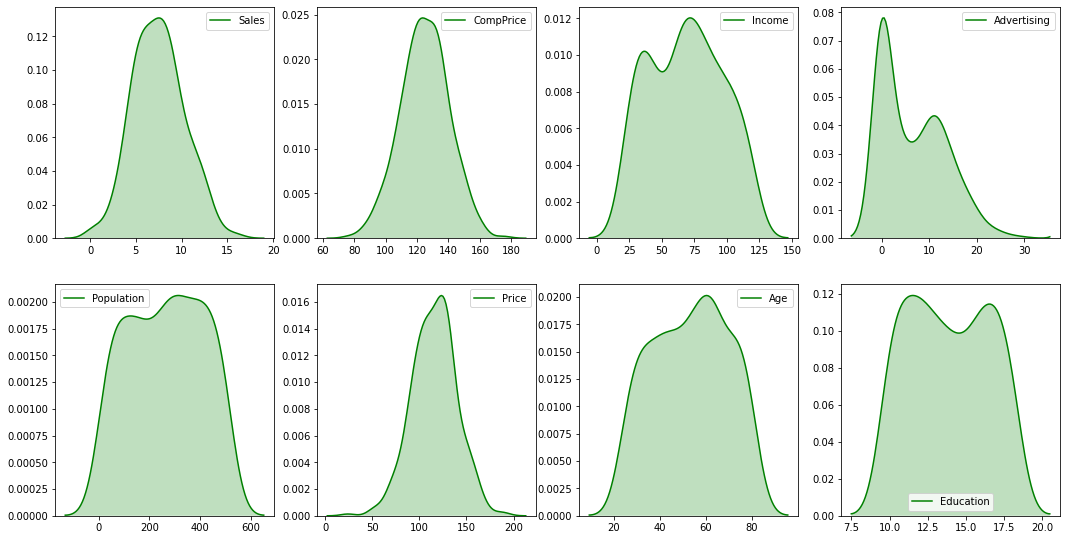

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
Kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [14]:
# Plotting Graphs
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(company_df[col],color='g',shade=True)
plt.show()
num_data = company_df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['Skewness','Kurtosis'])

## Only CompPrice and Price Column has Positive Kurtosis, Remaining columns have Negative Kurtosis 

In [15]:
# One hot Encoding
company_df1 = pd.get_dummies(company_df1, columns = ['ShelveLoc','Urban','US'])

## Correlation Analysis

<AxesSubplot:>

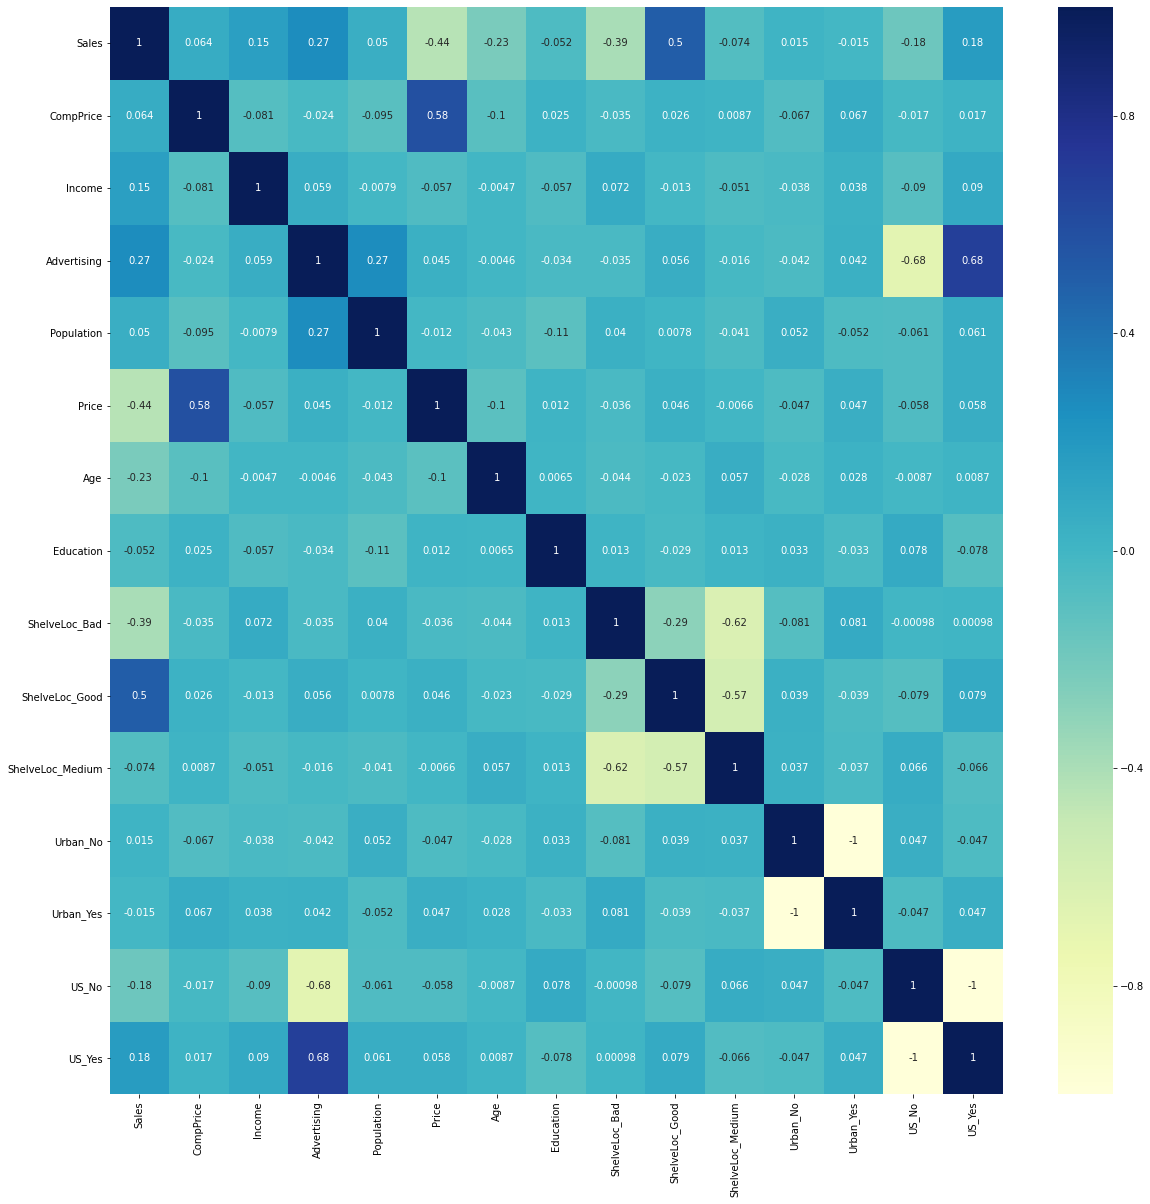

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(company_df1.corr(),cmap='YlGnBu',annot=True)

## Random Forest Model
## Since the target variable is continious, we create a class of the value based on the mean
## <= 7.49 == "Small" and > 7.49 == "large" 

In [17]:
company_df1["sales"]="small"
company_df1.loc[company_df1["Sales"]>7.49,"sales"]="large"
company_df1.drop(["Sales"],axis=1,inplace=True)

In [18]:
x = company_df1.iloc[:,0:14]
y = company_df1.iloc[:,14]

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [20]:
y_train.value_counts()

large    161
small    159
Name: sales, dtype: int64

In [21]:
# Model Building
model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.790625

In [22]:
pred_train = model.predict(x_train)

In [23]:
pred_train

array(['large', 'large', 'small', 'small', 'small', 'small', 'large',
       'small', 'small', 'large', 'small', 'large', 'large', 'small',
       'large', 'small', 'small', 'small', 'large', 'large', 'small',
       'large', 'small', 'large', 'large', 'large', 'small', 'large',
       'large', 'large', 'small', 'small', 'large', 'small', 'small',
       'large', 'small', 'large', 'small', 'large', 'small', 'large',
       'small', 'large', 'large', 'large', 'small', 'large', 'small',
       'large', 'small', 'small', 'large', 'small', 'small', 'large',
       'small', 'small', 'large', 'large', 'small', 'small', 'large',
       'small', 'small', 'small', 'small', 'large', 'large', 'small',
       'large', 'small', 'small', 'large', 'small', 'large', 'small',
       'small', 'small', 'large', 'large', 'large', 'large', 'large',
       'small', 'small', 'large', 'large', 'small', 'small', 'small',
       'small', 'large', 'small', 'small', 'small', 'small', 'large',
       'large', 'lar

In [24]:
accuracy_score(y_train,pred_train)

1.0

In [25]:
confusion_matrix(y_train,pred_train)

array([[161,   0],
       [  0, 159]], dtype=int64)

In [26]:
pred_test = model.predict(x_test)

In [27]:
pred_test

array(['large', 'large', 'small', 'small', 'small', 'large', 'small',
       'small', 'small', 'small', 'large', 'small', 'large', 'large',
       'small', 'large', 'small', 'small', 'large', 'small', 'small',
       'small', 'small', 'small', 'large', 'large', 'large', 'large',
       'large', 'small', 'small', 'small', 'large', 'small', 'small',
       'large', 'large', 'small', 'large', 'large', 'large', 'large',
       'small', 'large', 'small', 'large', 'small', 'small', 'large',
       'small', 'small', 'large', 'large', 'large', 'small', 'large',
       'large', 'large', 'large', 'large', 'large', 'large', 'small',
       'large', 'large', 'small', 'large', 'large', 'large', 'large',
       'large', 'small', 'large', 'large', 'small', 'small', 'small',
       'large', 'large', 'large'], dtype=object)

In [28]:
accuracy_score(y_test,pred_test)

0.8125

In [29]:
confusion_matrix(y_test,pred_test)

array([[34,  4],
       [11, 31]], dtype=int64)

In [30]:
company_df2=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [31]:
company_df2

,Actual,Predicted
369,large,large
281,large,large
201,small,small
354,small,small
214,small,small
169,large,large
146,small,small
215,small,small
390,small,small
200,small,small


In [32]:
cols = list(company_df1.columns)

In [33]:
predictors = cols[0:14]
target = cols[14]

In [34]:
tree1 = model.estimators_[20]

In [35]:
dot_data = StringIO()

In [36]:
export_graphviz(tree1, out_file = dot_data, feature_names =predictors, class_names = target, filled =True,rounded=True,impurity =False,proportion=False,precision =2)

In [37]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [38]:
graph.write_png('Company_Data.png')

True

## Conclusion
## Since the accuracy of the Training set is 100% we test the accuracy on the test data which is 81%
## As seen in the confusion matrix of Test data 65 instances are predicted correctly and 15 instances are not 

In [39]:
rf_small = RF(n_estimators=10, max_depth = 3)

In [40]:
rf_small.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
tree_small = rf_small.estimators_[5]

In [42]:
export_graphviz(tree_small, out_file = dot_data, feature_names = predictors, rounded = True, precision = 1)

In [43]:
graph_small = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [44]:
graph.write_png('Company_Data1.png')

True

In [45]:
img = mpimg.imread('Company_Data1.png')

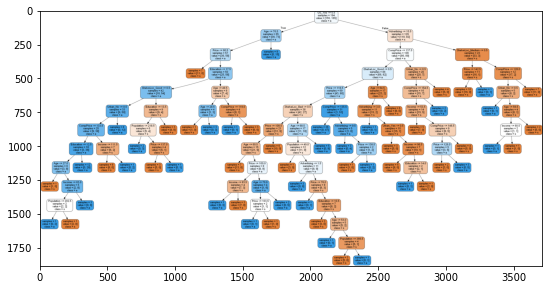

In [46]:
plt.imshow(img)

In [47]:
model.feature_importances_

array([0.12553661, 0.09328397, 0.09798255, 0.09144079, 0.23409701,
       0.11770508, 0.0587707 , 0.03426961, 0.07383856, 0.0222368 ,
       0.01504342, 0.01231004, 0.0103305 , 0.01315437])

In [48]:
feature_imp = pd.DataFrame({'Feature': list(x_train.columns),
                   'Importance': model.feature_importances_}).\
                    sort_values('Importance', ascending = False)

In [49]:
feature_imp

,Feature,Importance
4,Price,0.234097
0,CompPrice,0.125537
5,Age,0.117705
2,Advertising,0.097983
1,Income,0.093284
3,Population,0.091441
8,ShelveLoc_Good,0.073839
6,Education,0.058771
7,ShelveLoc_Bad,0.034270
9,ShelveLoc_Medium,0.022237


## As seen in the above Table Price is most Important Feature